# **Data Description**

The data being used throughout the course of this customer prediction problem, consists of the following columns:
* **Patient_Number** A Unique identifier for each of the customers
* **Age** Age of the customer
* **Gender** Gender of the customer (Male or Female)
* **Operation_Type** The Operation Type of the customer (Colostomy/Ileostomy/Urostomy/Nephrostomy/Incontinence/Catheter or Other)
* **Location** Location of the patient by territory (SC, NI, NW, NE, SE1, SE2, SW, CT, ET)
* **Product_QI** Whether the patient has raised a product related QI in the last 12 months
* **Service_QI** Whether the patient has raised a service related QI in the last 12 months
* **Days_since_last_order** How many days have passed since the patient last ordered
* **Churn** A binary indicator (1 or 0) representing whether the patient has churned (1) or not (0). 

In [1]:
# Importing the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
#Reading in the data and displaying the top 10 rows
df=pd.read_csv('C:/Users/rajpal/Documents/ChurnData.csv', encoding="ISO-8859-1", low_memory=False)
df.head(10)

,Patient_Number,Age,Gender,Operation_Type,Location,Product_QI,Service_QI,Days_since_last_order,Churn
0,P661932,81,F,INCONTINENCE,NW,0,0,403,0
1,P746278,84,F,ILEOSTOMY,CT,0,0,124,0
2,P595686,52,F,INCONTINENCE,SE1,0,0,72,0
3,P542932,86,F,COLOSTOMY,CT,0,0,97,0
4,P716350,100,F,COLOSTOMY,SE1,0,0,140,0
5,P738115,94,M,COLOSTOMY,SC,0,0,37,0
6,P487787,88,F,COLOSTOMY,SE1,0,0,183,0
7,P507348,62,F,COLOSTOMY,SE2,0,0,41,0
8,P375373,65,M,ILEOSTOMY,SW,1,1,70,0
9,P663796,93,F,ILEOSTOMY,SW,0,0,47,0


# **Exploratory Data Analysis (EDA)**

We then perrform some basis exploratory data analysis - this being a critical step for when analyzing a new dataset, as it allows us to better understand the distribution, any outliers or anomalies that may be present in the dataset. 

In [3]:
df.sample(110)

,Patient_Number,Age,Gender,Operation_Type,Location,Product_QI,Service_QI,Days_since_last_order,Churn
5271,P482414,14,M,ILEOSTOMY,CT,0,0,72,0
6726,P382830,76,F,ILEOSTOMY,NW,0,0,47,0
124,P445888,73,M,COLOSTOMY,SW,0,0,49,0
1640,P378041,80,M,ILEOSTOMY,SC,0,0,21,0
5327,P474178,71,M,COLOSTOMY,SE1,0,0,22,0
...,...,...,...,...,...,...,...,...,...
1790,P591229,67,F,ILEOSTOMY,CT,0,0,3,0
6491,P475730,78,F,OTHER,SE1,0,0,21,0
8611,P654106,35,F,COLOSTOMY,SE2,0,0,174,0
5496,P626223,77,M,ILEOSTOMY,CT,0,0,25,0


In [4]:
# This tells us that we have 12,390 instances with 9 features
df.shape

(12390, 9)

In [5]:
#This gives us the columns in the dataframe
df.columns

Index(['Patient_Number', 'Age', 'Gender', 'Operation_Type', 'Location',
       'Product_QI', 'Service_QI', 'Days_since_last_order', 'Churn'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12390 entries, 0 to 12389
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Patient_Number         12390 non-null  object
 1   Age                    12390 non-null  int64 
 2   Gender                 12390 non-null  object
 3   Operation_Type         12390 non-null  object
 4   Location               12390 non-null  object
 5   Product_QI             12390 non-null  int64 
 6   Service_QI             12390 non-null  int64 
 7   Days_since_last_order  12390 non-null  int64 
 8   Churn                  12390 non-null  int64 
dtypes: int64(5), object(4)
memory usage: 871.3+ KB


From the above, we can see that all the data types seem to be well chosen:
* Numerical Data (Age, Product_QI, Service_QI, Days_since_last_churn & Churn are all of integer type)
* Categorical Data (Patient_Number, Gender, Operation_Type & location are of object type)

In [7]:
# This helps us to see what proportion of the instances are null for each of the variables
df.isna().sum()/len(df)*100

Patient_Number           0.0
Age                      0.0
Gender                   0.0
Operation_Type           0.0
Location                 0.0
Product_QI               0.0
Service_QI               0.0
Days_since_last_order    0.0
Churn                    0.0
dtype: float64

From the above, we see that we have no null values across any of the variables

In [8]:
# This helps us to see if there are any duplicated records in the dataframe
df.duplicated().sum()

0

Evidently there are no duplicated patients or records in the df

In [9]:
# This provides a summary of the numerical variables
df.describe()

,Age,Product_QI,Service_QI,Days_since_last_order,Churn
count,12390.000000,12390.000000,12390.000000,12390.000000,12390.000000
mean,67.665860,0.048749,0.121630,91.119532,0.064568
std,20.381534,0.215352,0.326872,134.113782,0.245772
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,58.000000,0.000000,0.000000,29.000000,0.000000
50%,72.000000,0.000000,0.000000,56.000000,0.000000
75%,82.000000,0.000000,0.000000,106.000000,0.000000
max,104.000000,1.000000,1.000000,2402.000000,1.000000


### **Age**
The average age of the patients is around 67.7 years

Given the nature of ostomy patients, the ages vary widely; with the youngest being 0 years of age (paediatric patients) and the eldest being 104 years. 

The majority of patients fall within the ranges of 58 and 72 years of age.

The spread of ages is given by a standard deviation of around 20.4 years.d
### **Product_QI**
On average 4.9% of patients report a product related QI

Product QIs are binary indicators with 1 representing a Product QI being reported and 0 representing no Product QI being reported.

The spread of patients reporting product related QIs is given by a standard deviation of around 0.215.

### **Service**
On average 12.2% of patients report a service related QI

Service QIs are binary indicators with 1 representing a Service QI being reported and 0 representing no Service QI being reported.

The spread of patients reporting service related QIs is given by a standard deviation of around 0.327.

### **Days_since_last_order**
On average, the number of days since the last order is 91 days

The minimum number of days since a patient placing order is 0, whilst at most, this has been 2,402 days. 

The majority of patients place their order between 29 and 56 days previous. 

The spread of days since last order is given by the standard deviation of 134 days. 

### **Churn**
Arund 6.5% of patients churn (have a Churn value of 1), whilst the remaining 93.5% have not churned (Churn value of 0).

This is given by the mean churn value of 0.0645.

Churn values are binary (0 or 1), indicating whether a patient has churned or not.

Churn rate is not evenly distributed, as the majority of patients do not churn, and instead leave our service for non-preventable reasons (deceased, reversal etc.) years.

In [10]:
# This gives a short summary of the categorical variables in our df
df.describe(include=['object'])

,Patient_Number,Gender,Operation_Type,Location
count,12390,12390,12390,12390
unique,12205,2,7,9
top,P516142,M,ILEOSTOMY,SC
freq,3,6498,4938,2811


In [11]:
df['Gender'].value_counts()

Gender
M    6498
F    5892
Name: count, dtype: int64

In [12]:
df['Operation_Type'].value_counts()

Operation_Type
ILEOSTOMY       4938
COLOSTOMY       4295
UROSTOMY         831
NEPHROSTOMY      734
OTHER            704
INCONTINENCE     597
CATHETER         291
Name: count, dtype: int64

In [13]:
df['Location'].value_counts()

Location
SC     2811
CT     2072
NE     1809
SE1    1490
ET     1328
SE2    1313
SW     1064
NW      492
NI       11
Name: count, dtype: int64

### **Gender**
The dataset includes information about 2 unique genders

The most common is Male, which appears 6,498 times

Therefore there are more Males than Females in this dataset

### **Operation Type**
The dataset includes infomation on 7 unique operation types, these being Ileostomy, Colostmy, Urostomy, Nephrostomy, Other, Incontinence & Catheter. 

The most common for which being Ileostomy, which appears 4,938 times. 

We should appreciate that the vast majority of patients do have an ileostomy so this would be representative of the wider population. 
### **Location**
The dataset consists of information about 9 unique locations, these being SC, NI, NW, NE, SE1, SE2, SW, CT, ET.

The most frequent of which is Scotland, which appears 2,811 times.


In [14]:
# We then proceed to check the correlation between the numerical variables

numerical_columns=['Age', 'Product_QI', 'Service_QI', 'Days_since_last_order', 'Churn']
df[numerical_columns].corr()

,Age,Product_QI,Service_QI,Days_since_last_order,Churn
Age,1.000000,0.049668,0.076954,-0.092202,-0.063241
Product_QI,0.049668,1.000000,0.193254,-0.026458,0.028977
Service_QI,0.076954,0.193254,1.000000,-0.036650,0.036870
Days_since_last_order,-0.092202,-0.026458,-0.036650,1.000000,-0.008097
Churn,-0.063241,0.028977,0.036870,-0.008097,1.000000


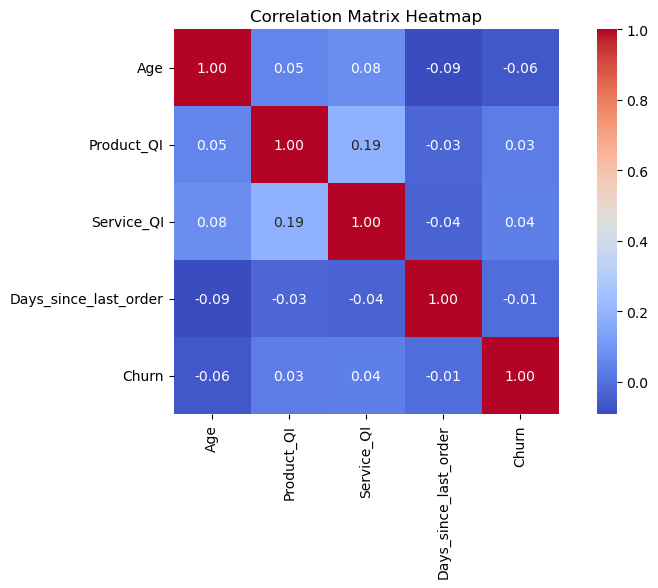

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix
corr_matrix = df[numerical_columns].corr()

# Create the heatmap with annotations displayed on all cells
plt.figure(figsize=(10, 5))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', square=True, fmt=".2f")  # Adjust fmt for decimal places
plt.title('Correlation Matrix Heatmap')
plt.show()

### **Age & Churn**
There appears to be a slight negative correlation between Age and churn (-0.06); this suggests that older patients are less likely to churn. However the correlation is weak, so further analysis may be needed to confirm any relationships.

### **Product & Service QIs**
There's a moderate positive correlation between Product & Service related QIs (0.19); this indicating that the patients who report Product related QIs are more likely to report Service related QIs.

We should appreciate that the vast majority of patients do have an ileostomy so this would be representative of the wider population. 
### **Days since last order & Churn**
There exists a weak negative correlation between days since last order & Churn (-0.01); which initially could suggest that patients who have recently placed an order might be less likely to churn - which very much make sense. However, we should be mindful as this correlation is indeed very weak. 

The other correlations that are present in the data are generally weak or negligible, thereby indicating minimal relationships between the other variables. 


In [16]:
# We then proceed to drop the unique identifier (Patient Number) from our dataset since not relevant for the analysis
df.drop(columns=['Patient_Number'], axis=1, inplace=True)

In [17]:
# Printing the columns again so we know what the dataframe looks like
df.columns

Index(['Age', 'Gender', 'Operation_Type', 'Location', 'Product_QI',
       'Service_QI', 'Days_since_last_order', 'Churn'],
      dtype='object')

In [18]:
# Check for typo's & suspicious values and rechecking dataset 

for column in df.columns:
    unique_values = df[column].unique()
    print(f"Unique values in '{column}': {unique_values}")
    print()

missing_values = df.isnull().sum()
data_types = df.dtypes

print('-'*50)
print("Missing values:")
print(missing_values)
print()

x = df.duplicated().sum()
print('-'*50)
print("Duplicate values:", x)
print()


y = df.shape
print('-'*50)
print("Shape of Dataset:", y)
print()

z = df.columns
print('-'*50)
print("Columns of Datset:", z)
print()

print('-'*50)
print("\nData types:")
print(data_types)
print()

Unique values in 'Age': [ 81  84  52  86 100  94  88  62  65  93  87  66  95  53  79  89  82  55
  91  78  83  74  68  92  45  85  69  90  10  96  61  67  98  70  75  50
  72  58  46  60  51  97  77  64  80 102  39  73  59  41  14  57  63  37
  76  20  71  42  19  48  28  24  15  40  49  56  23  18 101  34  99  17
  31  26  54  36  13   9 104  22   8  44  25  33  21  43  27  35  16  12
  30   4  11  47  32   7   6  29   2   5  38   3   1   0]

Unique values in 'Gender': ['F' 'M']

Unique values in 'Operation_Type': ['INCONTINENCE' 'ILEOSTOMY' 'COLOSTOMY' 'UROSTOMY' 'OTHER' 'NEPHROSTOMY'
 'CATHETER']

Unique values in 'Location': ['NW' 'CT' 'SE1' 'SC' 'SE2' 'SW' 'NE' 'ET' 'NI']

Unique values in 'Product_QI': [0 1]

Unique values in 'Service_QI': [0 1]

Unique values in 'Days_since_last_order': [ 403  124   72   97  140   37  183   41   70   47   14    7   64  125
  148   19  307  164   12   22   68   99  102   93   15    2  117  121
   16 1402   11  150   35  170   44  188 1107  427   

From the above, we can conclude that the dataset has been thoroughly cleaned and there is no suspcious values or types, or other that may warrant further investigation. 

# **Outlier Treatment**
In order to improve the model accuracy and reliability, it's imperative to identify and remove any of the outliers which may be present. These data points can hinder the model's learning process and therefore lead to innacurate results.

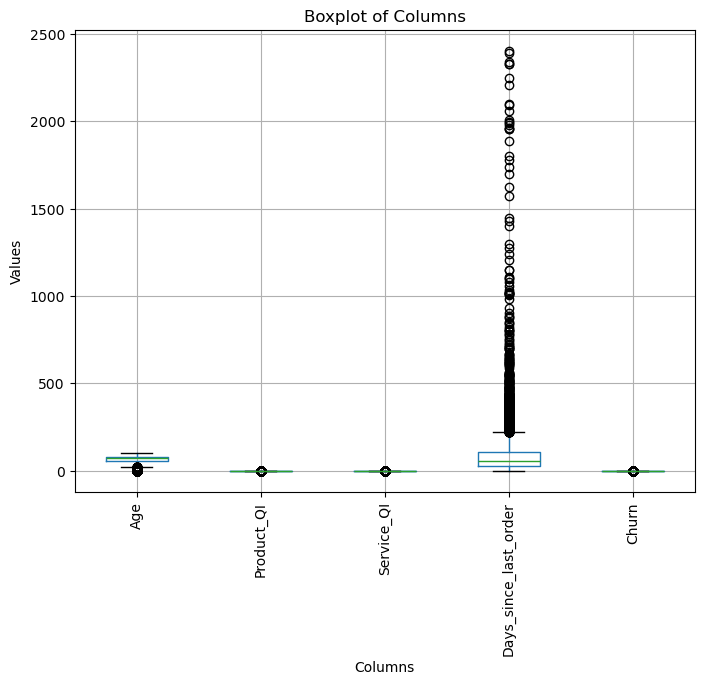

In [19]:
# Adjust figure size based on the number of columns
num_columns = len(df.columns)
fig, ax = plt.subplots(figsize=(10, 6))
if num_columns > 16:
    fig.set_size_inches(10, num_columns * 0.6)
else:
    fig.set_size_inches(num_columns, 6)

# Create a boxplot for each column
df.boxplot(ax=ax)

# Set the title and labels
plt.title("Boxplot of Columns")
plt.xlabel("Columns")
plt.ylabel("Values")

# Rotate the x-axis labels for better readability (optional)
plt.xticks(rotation=90)

# Show the plot
plt.show()

From the above, we see that outliers may be present in the 'Days_since_last_order' column. Specifically, this is the days difference between the day they were deleted and the day they last placed an order. Therefore, the logic being, if a patient hasn't ordered for 6 months or so, then they are likely to have left our service for a preventable reason of some sort. However, we see that we have some patients with days since last order above 1500! Therefore, we decide to remove those patients who have a 'Days_since_last_order' value greater than 200 days.


In [20]:
df=df[df['Days_since_last_order']<200]

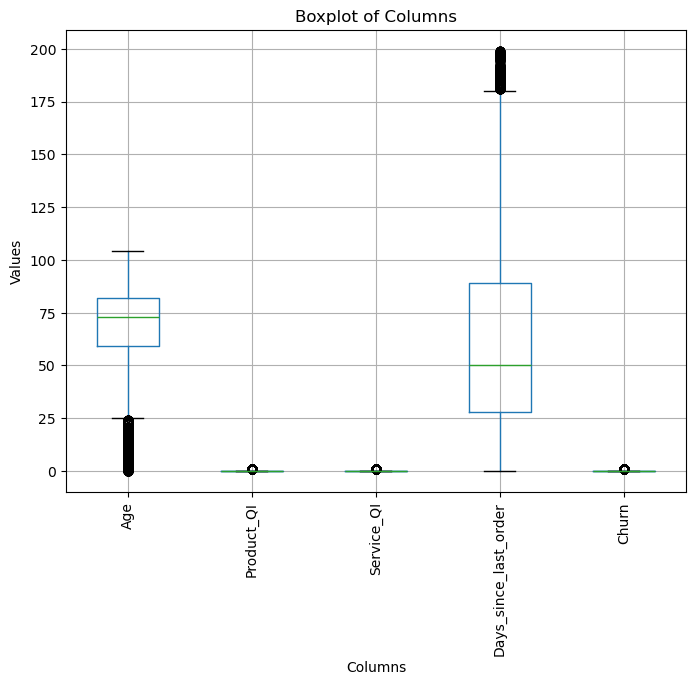

In [21]:
# Adjust figure size based on the number of columns
num_columns = len(df.columns)
fig, ax = plt.subplots(figsize=(10, 6))
if num_columns > 16:
    fig.set_size_inches(10, num_columns * 0.6)
else:
    fig.set_size_inches(num_columns, 6)

# Create a boxplot for each column
df.boxplot(ax=ax)

# Set the title and labels
plt.title("Boxplot of Columns")
plt.xlabel("Columns")
plt.ylabel("Values")

# Rotate the x-axis labels for better readability (optional)
plt.xticks(rotation=90)

# Show the plot
plt.show()

We observe that there are still some outliers present in the dataset, however these are heavily justified due to the nature of the demography of ostomy patients.

In [22]:
df_cleaned=df.copy()

# **Feature Encoding**

The purpose of carrying out Feature Encoding is to convert the categorical data (such as Operation Type, Territory or Gender) into numbers so that the ML algorithms can understand it.

In [23]:
# This selects the categorical columns from the df
categorical_columns = df.select_dtypes(include=['object']).columns
categorical_columns

Index(['Gender', 'Operation_Type', 'Location'], dtype='object')

Above are the categorical variables that we need to encode.

In [24]:
# This converts the categorical columns to numericals using one-hot encoding and drops the first category to avoid redundancy.

df = pd.get_dummies(df, columns=['Gender', 'Operation_Type', 'Location'], drop_first = True)

In [25]:
df.head()

,Age,Product_QI,Service_QI,Days_since_last_order,Churn,Gender_M,Operation_Type_COLOSTOMY,Operation_Type_ILEOSTOMY,Operation_Type_INCONTINENCE,Operation_Type_NEPHROSTOMY,Operation_Type_OTHER,Operation_Type_UROSTOMY,Location_ET,Location_NE,Location_NI,Location_NW,Location_SC,Location_SE1,Location_SE2,Location_SW
1,84,0,0,124,0,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False
2,52,0,0,72,0,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False
3,86,0,0,97,0,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False
4,100,0,0,140,0,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False
5,94,0,0,37,0,True,True,False,False,False,False,False,False,False,False,False,True,False,False,False


In [26]:
# This converts the columns converted using one-hot encoding into numericals
df[df.columns[df.dtypes == 'bool']] = df[df.columns[df.dtypes == 'bool']].astype(int)

In [27]:
df.head()

,Age,Product_QI,Service_QI,Days_since_last_order,Churn,Gender_M,Operation_Type_COLOSTOMY,Operation_Type_ILEOSTOMY,Operation_Type_INCONTINENCE,Operation_Type_NEPHROSTOMY,Operation_Type_OTHER,Operation_Type_UROSTOMY,Location_ET,Location_NE,Location_NI,Location_NW,Location_SC,Location_SE1,Location_SE2,Location_SW
1,84,0,0,124,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
2,52,0,0,72,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
3,86,0,0,97,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
4,100,0,0,140,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
5,94,0,0,37,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11256 entries, 1 to 12389
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   Age                          11256 non-null  int64
 1   Product_QI                   11256 non-null  int64
 2   Service_QI                   11256 non-null  int64
 3   Days_since_last_order        11256 non-null  int64
 4   Churn                        11256 non-null  int64
 5   Gender_M                     11256 non-null  int32
 6   Operation_Type_COLOSTOMY     11256 non-null  int32
 7   Operation_Type_ILEOSTOMY     11256 non-null  int32
 8   Operation_Type_INCONTINENCE  11256 non-null  int32
 9   Operation_Type_NEPHROSTOMY   11256 non-null  int32
 10  Operation_Type_OTHER         11256 non-null  int32
 11  Operation_Type_UROSTOMY      11256 non-null  int32
 12  Location_ET                  11256 non-null  int32
 13  Location_NE                  11256 non-null  int32


From the above, we can confirm that the data types of all variables are ok, so we can proceed forward.

# **Distribution of Data**

The distribution of the data plays an important role in ML, with skewed distributions often leading to biased models - particularly when dealing with imbalanced classes. 

By better understanding the data's distribution, we can implement the appropriate strategies to mitigate such challenges & therefore achieve better model performance. 

In [29]:
df.shape

(11256, 20)

From the above, we now see that we have 11,256 instances across 20 variables.

In [30]:
# Select appropriate bin size using sturges_rule
import math

def sturges_rule(num_data_points):
    k = 1 + math.log2(num_data_points)
    return int(k)

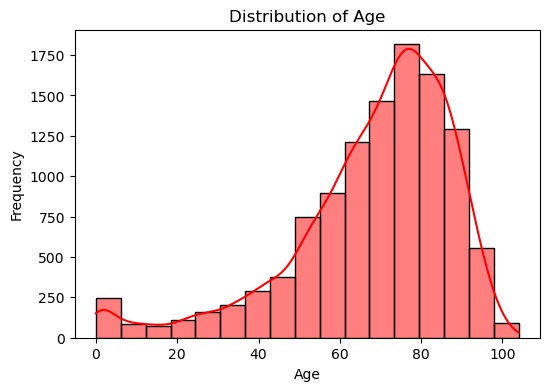

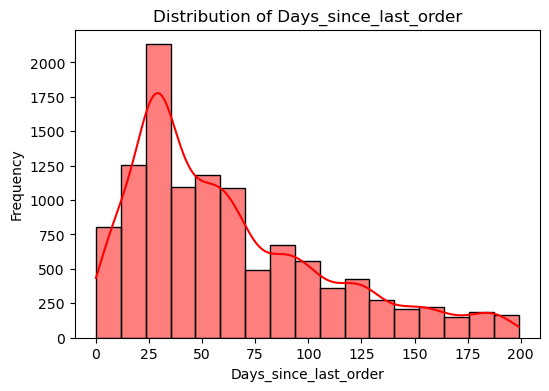

In [31]:
# check distribution of all continuous variables
continuous_vars = df.select_dtypes(include=['float64', 'int64']).columns

# Exclude binary variables from the list
binary_vars = [var for var in continuous_vars if df[var].nunique() == 2]

# Exclude binary variables from the continuous variables
continuous_vars = [var for var in continuous_vars if var not in binary_vars]

# Plot the distribution of each continuous variable
for var in continuous_vars:
    plt.figure(figsize=(6, 4))
    sns.histplot(data=df, x=var, bins=17, kde=True, color="red")
    plt.xlabel(var)
    plt.ylabel('Frequency')
    plt.title(f'Distribution of {var}')
    plt.show()

In [32]:
df[continuous_vars].skew()

Age                     -1.280422
Days_since_last_order    1.005165
dtype: float64

From the above, we observe that the Age variable is negatively skewed to the left, with a longer tail being seen on the left side of the distribution. This meaning that more older patients are in the dataset compared to younger patients, which would make sense. 

As for Days_since_last_order, we see that this is skewed to the right, with a longer tail being observed on the right side of the distribution. This meaning that more patients have recently placed orders (which would make sense, since those who have not churned, are likely to make up the majority of this cohort). 

# **Checking colinearity between variables**

Within ML, it's important to identify and address highly correlated variables, as redundant features sometimes provide overlapping information - therefore leading to model instability and overfitting. 

Overfitting occurs when a model becomes too closely aligned to the training data, therefore hindering its ability to generalize to new unseen data.

By removing such variables, the model can then focus its efforts on only those distinct, meaningful information; therefore enhancing reliability and interpretability of the model. 


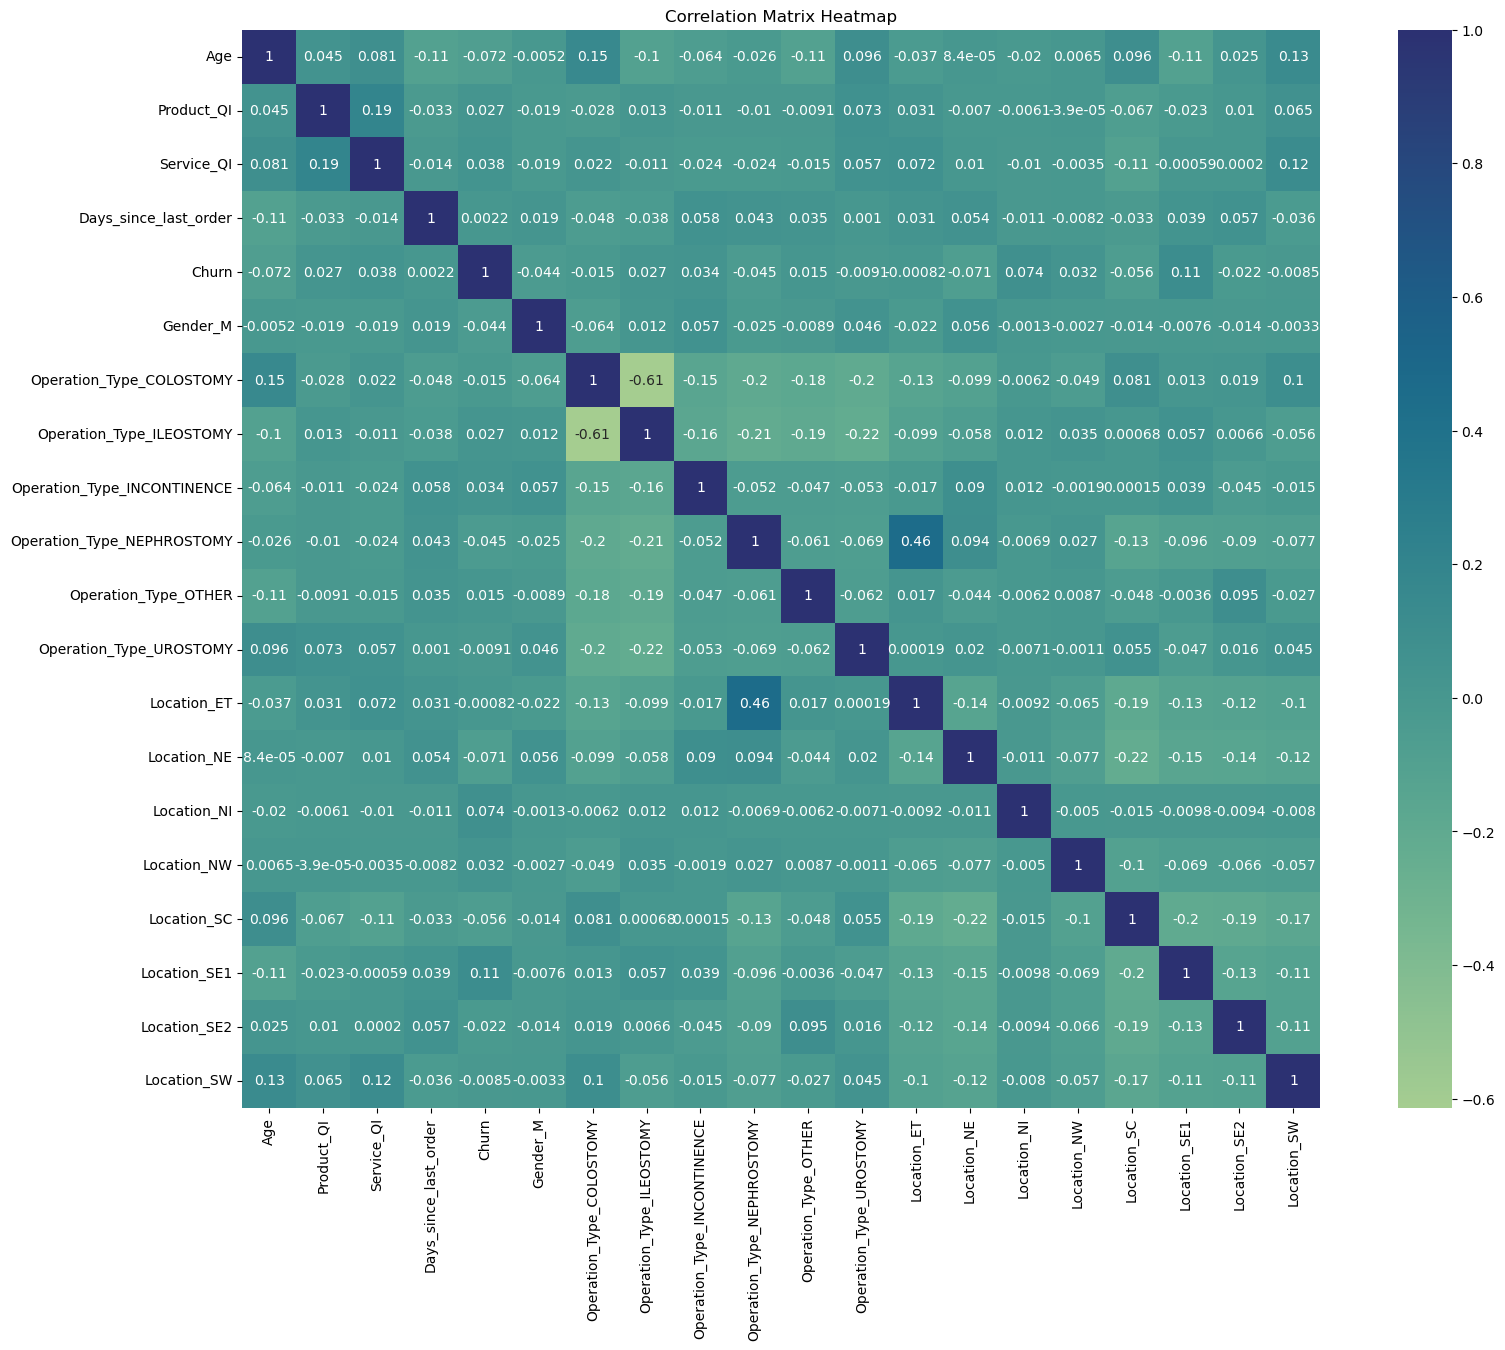

In [33]:
#checking colinearity between variables

corr_matrix = df.corr()

plt.figure(figsize=(20,14)) #(width,height)
sns.heatmap(corr_matrix, annot=True, cmap='crest', square=True)
plt.title('Correlation Matrix Heatmap')
plt.show()

From the above, we can observe that none of the variables appear to be highly correlated, so we are safe to proceed.

# **Splitting the data into Train & Test**

During this stage, we split our data up into Training & Test sets, by using the common 70:30 split, which is in fact common practice in ML to ensure generalizability. By allocating 70% towards training, the model can learn the intricate patterns and relationships from a decent proportion of the dataset, with the remaining 30% then being used for testing. This thereby providing an unbiased evaluation of how the model performs on unseen data. Further, this split also helps to prevent any overfitting from taking place - where the model learns the training data too much and therefore struggles to generalize. 


In [34]:
x = df.drop("Churn",axis=1)
y = df['Churn']

In [35]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [36]:
X_train.shape, y_train.shape


((7879, 19), (7879,))

From the above, we see that we have 7,879 instances in our Training Set.

In [37]:
X_test.shape, y_test.shape

((3377, 19), (3377,))

Therefore, in our test set, we see that we have 3,377 instances.

# **Feature Scaling**
Feature Scaling is commonly used in ML to ensure that all of the features in the dataset contribute equally to the learnign process. As a result of standardizing the range of values for each of the features, we can therefore prevent dominant features from overshadowing others in distance-based calculations that are used. As a result, this helps to prevent bias and improves the convergence of optimization algorithms. 


In [38]:
# Get the top 5 rows of the df
df.head(5)

,Age,Product_QI,Service_QI,Days_since_last_order,Churn,Gender_M,Operation_Type_COLOSTOMY,Operation_Type_ILEOSTOMY,Operation_Type_INCONTINENCE,Operation_Type_NEPHROSTOMY,Operation_Type_OTHER,Operation_Type_UROSTOMY,Location_ET,Location_NE,Location_NI,Location_NW,Location_SC,Location_SE1,Location_SE2,Location_SW
1,84,0,0,124,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
2,52,0,0,72,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
3,86,0,0,97,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
4,100,0,0,140,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
5,94,0,0,37,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0


In [39]:
columns_to_check = df.columns
columns_needs_to_be_scaled = []

for column in columns_to_check:
    if (df[column] > 1).any() or (df[column] < 0).any():
        columns_needs_to_be_scaled.append(column)

print("Columns with values greater than 1 or less than 0:")
print(columns_needs_to_be_scaled)

Columns with values greater than 1 or less than 0:
['Age', 'Days_since_last_order']


Above, we see that the columns which require scaling are 'Age' and 'Days_since_last_order'; since the majority of the variables are binary, min-max scaling was decided as being the most appropriate.

from sklearn.preprocessing import MinMaxScaler

columns_to_scale = ['Age', 'Days_since_last_order']

scaler = MinMaxScaler()

X_train[columns_to_scale] = scaler.fit_transform(X_train[columns_to_scale])

X_test[columns_to_scale] = scaler.transform(X_test[columns_to_scale])

Upon scaling features, .fit_transform() is applied to the training data to calculate the necessary parameters requires for scaling, and then transforms the data accordingly.

However, for the test dataset, we use .transform() as this applies the scaling parameters that have been learnt from the training data, withour having to recalculate them. This therefore ensures that consistency is being adhered to.

In [40]:
# This prints the top 5 rows of the train set
X_train.head(5)

,Age,Product_QI,Service_QI,Days_since_last_order,Gender_M,Operation_Type_COLOSTOMY,Operation_Type_ILEOSTOMY,Operation_Type_INCONTINENCE,Operation_Type_NEPHROSTOMY,Operation_Type_OTHER,Operation_Type_UROSTOMY,Location_ET,Location_NE,Location_NI,Location_NW,Location_SC,Location_SE1,Location_SE2,Location_SW
7440,80,0,0,109,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0
3946,71,0,0,21,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0
449,76,0,0,7,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
2297,69,0,0,101,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0
9190,55,0,0,16,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0


In [41]:
# This prints the top 5 rows of the test set
X_test.head(5)

,Age,Product_QI,Service_QI,Days_since_last_order,Gender_M,Operation_Type_COLOSTOMY,Operation_Type_ILEOSTOMY,Operation_Type_INCONTINENCE,Operation_Type_NEPHROSTOMY,Operation_Type_OTHER,Operation_Type_UROSTOMY,Location_ET,Location_NE,Location_NI,Location_NW,Location_SC,Location_SE1,Location_SE2,Location_SW
2645,46,0,0,68,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0
10444,87,0,0,5,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0
257,76,0,0,4,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
2183,87,0,0,38,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
946,31,0,1,11,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0


# **Class Imbalance**
Within ML, Class imbalance takes place when one class has significantly more data points than another. This can thereby lead to biased models that may favour the majority class over the other. In order to address this, techniques such as resampling, adjusting class weights or other are often used to ensure fair and accurate models are performing well across all of the classes.

In [42]:
# This counts the number of instances of each type
class_counts = df['Churn'].value_counts()
class_counts


Churn
0    10529
1      727
Name: count, dtype: int64

From the above, we see that we have 727 patients that have churned, and 10,529 patients who have not churned.

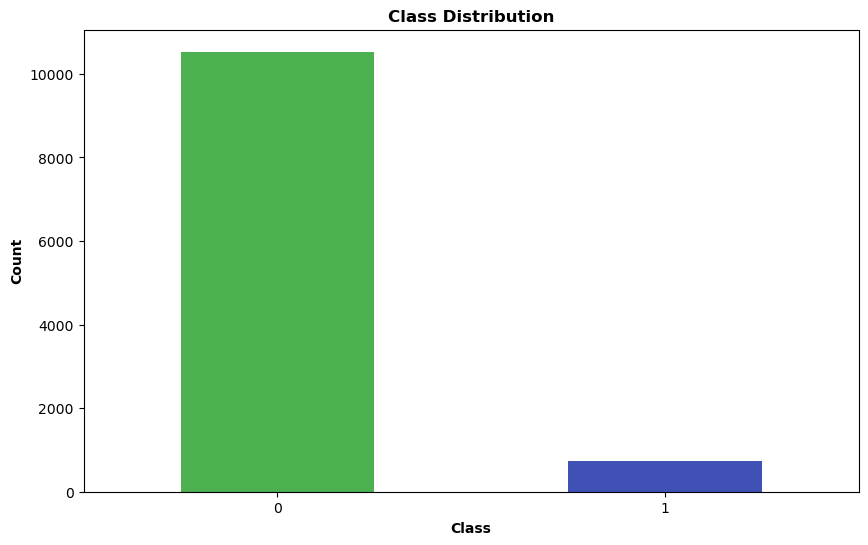

In [43]:
plt.figure(figsize=(10, 6)) 
class_counts.plot(kind='bar')
colors = ['#4CAF50', '#3F51B5'] 
class_counts.plot(kind='bar', color=colors)
plt.title('Class Distribution', fontweight="bold")
plt.xlabel('Class', fontweight="bold")
plt.ylabel('Count', fontweight="bold")
plt.xticks(rotation=360)
plt.show()

From the above, we can see that the churn variables are not evenly distributed, which means that we have a class imbalance present.

In [44]:
import pandas as pd
import numpy as np

# Upsample the minority class
minority_class = df[df['Churn'] == 1]
majority_class = df[df['Churn'] == 0]

upsampled_minority = minority_class.sample(replace=True, frac=len(majority_class) / len(minority_class))
upsampled_data = pd.concat([majority_class, upsampled_minority])

In [45]:
upsampled_minority

,Age,Product_QI,Service_QI,Days_since_last_order,Churn,Gender_M,Operation_Type_COLOSTOMY,Operation_Type_ILEOSTOMY,Operation_Type_INCONTINENCE,Operation_Type_NEPHROSTOMY,Operation_Type_OTHER,Operation_Type_UROSTOMY,Location_ET,Location_NE,Location_NI,Location_NW,Location_SC,Location_SE1,Location_SE2,Location_SW
11645,61,0,0,196,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0
1812,88,0,1,92,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
4975,34,1,1,13,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
8949,87,0,0,19,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0
9307,80,0,0,115,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4596,13,0,0,59,1,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0
2359,73,0,0,50,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
10887,33,0,0,52,1,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0
1608,91,0,0,3,1,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0


In [46]:
class_counts = upsampled_data['Churn'].value_counts()
class_counts

Churn
0    10529
1    10529
Name: count, dtype: int64

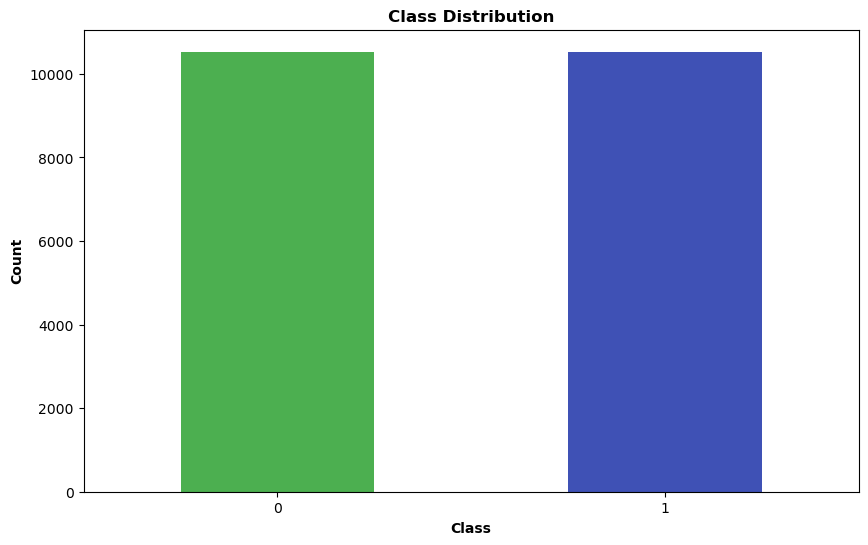

In [47]:
plt.figure(figsize=(10, 6)) 
class_counts.plot(kind='bar')
colors = ['#4CAF50', '#3F51B5'] 
class_counts.plot(kind='bar', color=colors)
plt.title('Class Distribution', fontweight="bold")
plt.xlabel('Class', fontweight="bold")
plt.ylabel('Count', fontweight="bold")
plt.xticks(rotation=360)
plt.show()

Therefore, from the above we observe that we now have a balanced dataset.

To continue, we must re-run the previous steps again, to receive our training/test sets, as well as the feature scaling which took place.

In [48]:
x = upsampled_data.drop("Churn",axis=1)
y = upsampled_data['Churn']

In [49]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [50]:
X_train.shape, y_train.shape


((14740, 19), (14740,))

In [51]:
X_test.shape, y_test.shape

((6318, 19), (6318,))

In [52]:
columns_to_check = df.columns
columns_needs_to_be_scaled = []

for column in columns_to_check:
    if (upsampled_data[column] > 1).any() or (upsampled_data[column] < 0).any():
        columns_needs_to_be_scaled.append(column)

print("Columns with values greater than 1 or less than 0:")
print(columns_needs_to_be_scaled)

Columns with values greater than 1 or less than 0:
['Age', 'Days_since_last_order']


In [53]:
from sklearn.preprocessing import MinMaxScaler

columns_to_scale = ['Age', 'Days_since_last_order']

scaler = MinMaxScaler()

X_train[columns_to_scale] = scaler.fit_transform(X_train[columns_to_scale])

X_test[columns_to_scale] = scaler.transform(X_test[columns_to_scale])

# **Feature Selection using Random Forests**
We then proceed with appplying Random Forest Feature Importance Method, which is a powerful tool for feature selection - particularly for when dealing with complex datasets, but also when interpretability is key. 

In [54]:
from sklearn.ensemble import RandomForestClassifier

rf_classifier = RandomForestClassifier(n_jobs=-1, random_state=42)

rf_classifier.fit(X_train, y_train)

importances = rf_classifier.feature_importances_

feature_importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': importances})

feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False).reset_index(drop=True)

feature_importance_df

,Feature,Importance
0,Days_since_last_order,0.387072
1,Age,0.352584
2,Location_NE,0.030334
3,Location_SE1,0.029248
4,Gender_M,0.024412
5,Service_QI,0.023345
6,Location_SC,0.021531
7,Operation_Type_ILEOSTOMY,0.015334
8,Location_SE2,0.014743
9,Location_ET,0.014214


C:\Users\rajpal\AppData\Local\Temp\ipykernel_28332\1606911056.py:5: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b-" (-> color='b'). The keyword argument will take precedence.
  plt.plot(range(1, len(importances) + 1), cumulative_importance, 'b-', color="coral")


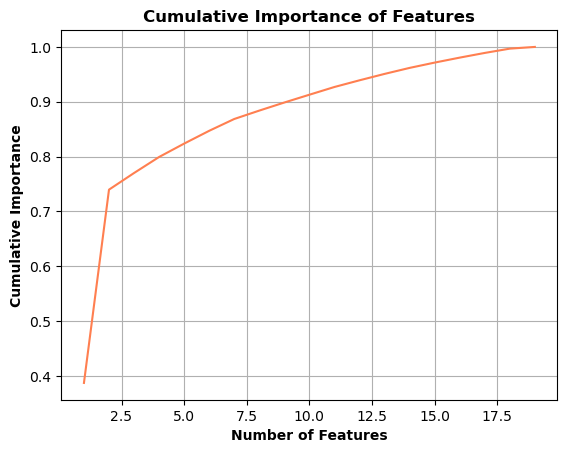

In [55]:
# We then apply the following to check for the most optimal number of features to use in our model
sorted_indices = np.argsort(importances)[::-1]
cumulative_importance = np.cumsum(importances[sorted_indices])

plt.plot(range(1, len(importances) + 1), cumulative_importance, 'b-', color="coral")
plt.xlabel('Number of Features', weight="bold")
plt.ylabel('Cumulative Importance', weight="bold")
plt.title('Cumulative Importance of Features', weight="bold")
plt.grid(True)
plt.show()

The above graph shows that the most important fetures to consider are the top 2, these being:
* **Days_since_last_order** This feature appears to be the most important score, carrying an importance score of 38.9%; suggesting the recency of a customers last order is a strong indicator of the target variable churn.
* **Age** is also a significant feature, this indicating that it has a substantial impact upon the outcome - carrying a score of 35.6%

As we move on, we see that the other features hold very little importance; with these 2 features alone accounting for just over 74% of the importance. In other words, this means that they are the most important variables to consider for when predicting churn. 

However, what we should appreciate is that the 'best' features ultimately depend on the specific use case (churn). This, together with the fact that there aren't many variables, all of them will be used during the course of this analysis.

In the event that they do not perform well or overfitting takes pla


# **Checking multi-colinearity between variables**
During the ML process, it's imperative to check for the presence of Multicollinearity, which is a statistical phenomenon that takes place when the independent variables of a regression model are highly correlated with eachother. If this is the case, then it can become difficult to determine the individual impact of each variable upon the dependent variable - this thereby leading to unreliable & unstable models, that therefore become redundant.

In [56]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif["Variable"] = X_train.columns
vif["VIF"] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif = vif.sort_values(by='VIF', ascending=False)

vif

,Variable,VIF
0,Age,11.091733
6,Operation_Type_ILEOSTOMY,6.594110
5,Operation_Type_COLOSTOMY,6.234037
3,Days_since_last_order,2.690357
10,Operation_Type_UROSTOMY,2.043374
8,Operation_Type_NEPHROSTOMY,1.930615
4,Gender_M,1.928971
15,Location_SC,1.916752
16,Location_SE1,1.841340
11,Location_ET,1.763884


From the above, we observe that the variables of Age, Operation_Type_ILEOSTOMY and Operation_Type_COLOSTOMY exhibit high VIF Scores - this meaning high collineairyt. To address this, we consider removing Operation_Type_ILEOSTOMY & Operation_Type_ILEOSTOMY, but retain Age due to its significantly high feature importance score.

In [57]:
del X_train['Operation_Type_ILEOSTOMY']
del X_train['Operation_Type_COLOSTOMY']

In [58]:
del X_test['Operation_Type_ILEOSTOMY']
del X_test['Operation_Type_COLOSTOMY']

In [59]:

vif = pd.DataFrame()
vif["Variable"] = X_train.columns
vif["VIF"] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif = vif.sort_values(by='VIF', ascending=False)

vif

,Variable,VIF
0,Age,5.030066
3,Days_since_last_order,2.422662
4,Gender_M,1.860205
13,Location_SC,1.801115
9,Location_ET,1.683866
14,Location_SE1,1.651097
10,Location_NE,1.468828
15,Location_SE2,1.447229
16,Location_SW,1.410407
6,Operation_Type_NEPHROSTOMY,1.316924


Re-running the above, we see that Age still has a score slighty higher than 5, but we will accept this due to its feature importance.

# **Model Building : Machine Learning Algorithms**
During this stage, we start by employing multiple machine learning algorithms such as Logistic Regression, DecisionTreeClassifier, KNeighboursClassifier etc, and assess their impact.

In [60]:
#importing algorithms, metrics and time

import time

from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier
from xgboost import XGBClassifier

In [61]:
algorithms = [
    LogisticRegression(n_jobs=-1, random_state=42),
    DecisionTreeClassifier(random_state=42),
    KNeighborsClassifier(n_jobs=-1),
    GaussianNB(),
    AdaBoostClassifier(random_state=42),
    GradientBoostingClassifier(random_state=42),
    RandomForestClassifier(n_jobs=-1, random_state=42),
    XGBClassifier(n_jobs=-1, random_state=42),
    SVC(random_state=42)
]

# Initialize the results dictionary for training data
results_train = {
    'Algorithm': [],
    'Accuracy': [],
    'Precision': [],
    'Recall': [],
    'F1-score': [],
    'Building Time (s)': []
}

# Apply the algorithms and calculate performance metrics for training data
for algorithm in algorithms:
    start_time = time.time()  # Start timer

    algorithm_name = type(algorithm).__name__
    algorithm.fit(X_train, y_train)
    y_train_pred = algorithm.predict(X_train)

    accuracy = accuracy_score(y_train, y_train_pred)
    precision = precision_score(y_train, y_train_pred, average='weighted')
    recall = recall_score(y_train, y_train_pred, average='weighted')
    f1 = f1_score(y_train, y_train_pred, average='weighted')

    end_time = time.time()  # End timer
    building_time = end_time - start_time

    results_train['Algorithm'].append(algorithm_name)
    results_train['Accuracy'].append(accuracy)
    results_train['Precision'].append(precision)
    results_train['Recall'].append(recall)
    results_train['F1-score'].append(f1)
    results_train['Building Time (s)'].append(building_time)

# Create a dataframe for the training data results
df_train = pd.DataFrame(results_train)
df_train

C:\Users\rajpal\AppData\Local\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


,Algorithm,Accuracy,Precision,Recall,F1-score,Building Time (s)
0,LogisticRegression,0.649864,0.649876,0.649864,0.649862,5.379163
1,DecisionTreeClassifier,0.998236,0.998242,0.998236,0.998236,0.070235
2,KNeighborsClassifier,0.923677,0.933624,0.923677,0.923227,1.032780
3,GaussianNB,0.611533,0.633323,0.611533,0.595307,0.032313
4,AdaBoostClassifier,0.668860,0.668864,0.668860,0.668860,0.366532
5,GradientBoostingClassifier,0.709498,0.709611,0.709498,0.709449,0.855402
6,RandomForestClassifier,0.998236,0.998242,0.998236,0.998236,0.304166
7,XGBClassifier,0.939552,0.941490,0.939552,0.939482,0.219527
8,SVC,0.705834,0.705834,0.705834,0.705834,22.600459


From the above, we can assert the following:
* Decision Tree Classifier, Random Forest Classifier & XGBClassifier consistently achieve the highest Accuracy, Precision, Recall & F-1 Score of them all. This could therefore potentially suggest overfitting on the training set.
* The KNeighbors Classifier also performs quite well, indicating that perhaps instance-based methods may be more suitable for the problem.
* There are also quite clearly some models that are underperforming; these notably being the Logistic Regression model, Gaussian Naive Bayes, AdaBoost Classifier, Gradient Boosting Classifier & SVC. Depsite being relatively okay, they are significantly poorer in comparison to the top-performing models. We should here not that this could be due to many other factors, such as the nature of the data, model complexity or the fact that hyperparameter tuning has not taken place.

In [63]:
# We then proceed to perform each of the models upon the test set
results_test = {
    'Algorithm': [],
    'Accuracy': [],
    'Precision': [],
    'Recall': [],
    'F1-score': []
}

# Apply the algorithms and calculate performance metrics for test data
for algorithm in algorithms:
    algorithm_name = type(algorithm).__name__
    y_test_pred = algorithm.predict(X_test)

    accuracy = accuracy_score(y_test, y_test_pred)
    precision = precision_score(y_test, y_test_pred, average='weighted')
    recall = recall_score(y_test, y_test_pred, average='weighted')
    f1 = f1_score(y_test, y_test_pred, average='weighted')

    results_test['Algorithm'].append(algorithm_name)
    results_test['Accuracy'].append(accuracy)
    results_test['Precision'].append(precision)
    results_test['Recall'].append(recall)
    results_test['F1-score'].append(f1)

# Create a dataframe for the test data results
df_test = pd.DataFrame(results_test)
df_test

,Algorithm,Accuracy,Precision,Recall,F1-score
0,LogisticRegression,0.634378,0.634375,0.634378,0.634369
1,DecisionTreeClassifier,0.956790,0.960239,0.956790,0.956716
2,KNeighborsClassifier,0.890788,0.909603,0.890788,0.889569
3,GaussianNB,0.603039,0.621455,0.603039,0.586585
4,AdaBoostClassifier,0.656220,0.656218,0.656220,0.656215
5,GradientBoostingClassifier,0.698955,0.699200,0.698955,0.698895
6,RandomForestClassifier,0.971985,0.973477,0.971985,0.971966
7,XGBClassifier,0.907249,0.912704,0.907249,0.906964
8,SVC,0.690567,0.690566,0.690567,0.690566


Upon the test set, we see that the Random Forest Classifier & XGB Classifier continue to exhibit significantly high performance relative to other models - in terms of Accuracy, Precision, Recall & F-1 Score. This therefore suggesting that their ability to generalize well to unseen data is exceptional. Alongside this, the Decision Tree model is also performing quite well, this indicating that even the more simpler models can be quite effective under certain scenarios. 

However, in the context of Churn prediction, the aim is to leverage effective retention campaigns towards those patients that are at risk of Churning - which can be quite expensive. Therefore, despite these Precision and Recall metrics being promising for the above models, it would be beneficial to know if this can be enhanced even further, such that resources can be allocated efficiently & cost effectively. For this reason, we proceed with building a model using Neural Networks, to see whether it provides any improvement to the above scores.

# **Model Building : Neural Networks**
During this stage, we will build a Neural Network, to hopefully capture the complex patterns and non-linear relationships that may be present in the dataset; with the hope of enhancing our performance metrics above.

In [65]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import plot_model
from tensorflow.keras.layers import Dense, BatchNormalization, Activation, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.metrics import recall_score

**Early Stopping**


Early Stopping is a a regularization technique which prevents Neural Networks from overfitting the data by halting the training when the validation loss stops seeing any improvement. This therefore ensuring that the model generalizes well to unseen data. 

By setting 'resort_best_weights=True', the models weights are therefore saved at each of the epochs with the lowest validation loss also being shown. This therefore guarantees that the final model will be the one that performs most optimal to new data.

Further, the evaluation metrics (such as Accuracy, Precision etc.) are all calculated by using the weights from the epoch with the best validation score. As a result, a more accurate assessment of the model's generalization ability is given.

In [66]:
# Define the EarlyStopping and ModelCheckpoint callbacks

early_stopping = EarlyStopping(
    monitor='val_loss',        # The metric to monitor. This is usually the validation loss.
    min_delta=0.001,           # The minimum amount of improvement required to consider the model to have improved.
    patience=10,               # The number of epochs to wait without improvement before stopping the training.
    verbose=1,                 # Print output
    mode='auto',               # Consider mode of the metric as min or max.
    restore_best_weights=True  # Whether to restore the model weights at the epoch with the best validation loss.
)


In [71]:
# This saves the best model to my personal working directory as 'Churn ClassifierRaj.h5'
checkpoint = ModelCheckpoint('ChurnClassifierRaj.h5.keras', monitor='val_loss', verbose=1, save_best_only=True, mode='min')

**Building Neural Network Architectures & Fitting Model on Training Data**


***Architecture 1***

In [73]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model]
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [74]:
history = model.fit(X_train, y_train, epochs=100, batch_size=128, validation_split=0.3, callbacks=[early_stopping, checkpoint],
                    verbose=1)

Epoch 1/100
 1/81 ━━━━━━━━━━━━━━━━━━━━ 5:09 4s/step - accuracy: 0.4922 - loss: 0.6906
Epoch 1: val_loss improved from inf to 0.62850, saving model to ChurnClassifierRaj.h5.keras
81/81 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6030 - loss: 0.6677 - val_accuracy: 0.6479 - val_loss: 0.6285
Epoch 2/100
 1/81 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.6484 - loss: 0.6224
Epoch 2: val_loss improved from 0.62850 to 0.61502, saving model to ChurnClassifierRaj.h5.keras
81/81 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6548 - loss: 0.6277 - val_accuracy: 0.6633 - val_loss: 0.6150
Epoch 3/100
 1/81 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.6719 - loss: 0.6152
Epoch 3: val_loss improved from 0.61502 to 0.60228, saving model to ChurnClassifierRaj.h5.keras
81/81 ━━━━━━━━━━━━━━━━━━━━ 0s 965us/step - accuracy: 0.6673 - loss: 0.6169 - val_accuracy: 0.6863 - val_loss: 0.6023
Epoch 4/100
 1/81 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.6953 - loss: 0.5743
Epoch 4: val_loss improve

***Architecture 2***

In [84]:
# Initialising the NN
model = Sequential()

# layers
model.add(Dense(units = 16, kernel_initializer = 'uniform', activation = 'relu', input_dim = 17))
model.add(Dense(units = 8, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dropout(0.25))
model.add(Dense(units = 4, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))
from keras.optimizers import SGD

# Compiling the ANN
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

C:\Users\rajpal\AppData\Local\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [85]:
# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=128, validation_split=0.3, callbacks=[early_stopping, checkpoint],
                    verbose=1)

Epoch 1/100
 1/81 ━━━━━━━━━━━━━━━━━━━━ 1:12 902ms/step - accuracy: 0.4766 - loss: 0.6931
Epoch 1: val_loss did not improve from 0.47984
81/81 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4991 - loss: 0.6932 - val_accuracy: 0.4871 - val_loss: 0.6932
Epoch 2/100
 1/81 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.5469 - loss: 0.6927
Epoch 2: val_loss did not improve from 0.47984
81/81 ━━━━━━━━━━━━━━━━━━━━ 0s 813us/step - accuracy: 0.4978 - loss: 0.6927 - val_accuracy: 0.4871 - val_loss: 0.6872
Epoch 3/100
 1/81 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.4922 - loss: 0.6828
Epoch 3: val_loss did not improve from 0.47984
81/81 ━━━━━━━━━━━━━━━━━━━━ 0s 798us/step - accuracy: 0.5533 - loss: 0.6812 - val_accuracy: 0.6416 - val_loss: 0.6570
Epoch 4/100
 1/81 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.7109 - loss: 0.6188
Epoch 4: val_loss did not improve from 0.47984
81/81 ━━━━━━━━━━━━━━━━━━━━ 0s 795us/step - accuracy: 0.6043 - loss: 0.6580 - val_accuracy: 0.6416 - val_loss: 0.6439

***Architecture 3***

In [86]:
# Build the neural network
model = Sequential([
    Dense(64, activation = 'relu', input_dim = 17),
    Dropout(0.5),
    Dense(32, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])

C:\Users\rajpal\AppData\Local\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [87]:
# Train the model on Architecture 3
history = model.fit(X_train, y_train, epochs=100, batch_size=128, validation_split=0.2, callbacks=[early_stopping, checkpoint],
                    verbose=1)

Epoch 1/100
83/93 ━━━━━━━━━━━━━━━━━━━━ 0s 621us/step - accuracy: 0.5225 - loss: 0.6965  
Epoch 1: val_loss did not improve from 0.47984
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5257 - loss: 0.6954 - val_accuracy: 0.6255 - val_loss: 0.6629
Epoch 2/100
 1/93 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.6406 - loss: 0.6645
Epoch 2: val_loss did not improve from 0.47984
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 815us/step - accuracy: 0.6074 - loss: 0.6642 - val_accuracy: 0.6381 - val_loss: 0.6451
Epoch 3/100
 1/93 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.6719 - loss: 0.6580
Epoch 3: val_loss did not improve from 0.47984
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 801us/step - accuracy: 0.6314 - loss: 0.6534 - val_accuracy: 0.6459 - val_loss: 0.6377
Epoch 4/100
 1/93 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.6328 - loss: 0.6552
Epoch 4: val_loss did not improve from 0.47984
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 775us/step - accuracy: 0.6347 - loss: 0.6449 - val_accuracy: 0.6489 - val_loss: 0.6335

From the above, we can observe that after trially multiple Neural Network Architectures, none of them have provided results which surpassed the performance metrics of those observed earlier with the ML models. Therefore, we will proceed with running an Ensembles of Random Forest.

# **Ensembles of Random Forest**
During this section, we will perform an Ensemble of Random Forests which is a powerful technique, which leverages multiple random forest models to improve the overall performance and reduce overfitting. 

In [95]:
# Initialize base estimator (Random Forest)
base_estimator = RandomForestClassifier(n_estimators=100, random_state=42)

# Initialize models
xgb_classifier=XGBClassifier(n_jobs=-1, random_state=42)
gradient_boost_model = GradientBoostingClassifier(n_estimators=50, random_state=42)
xgboost_model = XGBClassifier(n_estimators=50, random_state=42)

# Initialize lists to store metrics
models = ['xgb_classifier', 'Gradient Boosting', 'XGBoost']
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'Building Time']
results_train = {metric: [] for metric in metrics}
results_test = {metric: [] for metric in metrics}

# Train and evaluate models
for model in [xgb_classifier, gradient_boost_model, xgboost_model]:
    start_time = time.time()
    model.fit(X_train, y_train)
    end_time = time.time()

    # Predict on the training set
    y_train_pred = model.predict(X_train)

    # Calculate metrics on training data
    accuracy_train = accuracy_score(y_train, y_train_pred)
    precision_train = precision_score(y_train, y_train_pred, average='weighted')
    recall_train = recall_score(y_train, y_train_pred, average='weighted')
    f1_train = f1_score(y_train, y_train_pred, average='weighted')
    building_time = end_time - start_time

    # Predict on the test set
    y_test_pred = model.predict(X_test)

    # Calculate metrics on test data
    accuracy_test = accuracy_score(y_test, y_test_pred)
    precision_test = precision_score(y_test, y_test_pred, average='weighted')
    recall_test = recall_score(y_test, y_test_pred, average='weighted')
    f1_test = f1_score(y_test, y_test_pred, average='weighted')

    # Append metrics to the results dictionaries
    results_train['Accuracy'].append(accuracy_train)
    results_train['Precision'].append(precision_train)
    results_train['Recall'].append(recall_train)
    results_train['F1 Score'].append(f1_train)
    results_train['Building Time'].append(building_time)

    results_test['Accuracy'].append(accuracy_test)
    results_test['Precision'].append(precision_test)
    results_test['Recall'].append(recall_test)
    results_test['F1 Score'].append(f1_test)
    results_test['Building Time'].append(building_time)

# Create DataFrames from the results
results_train_df = pd.DataFrame(results_train, index=models)
results_test_df = pd.DataFrame(results_test, index=models)

# Display the DataFrames
print("Training Data Results:")
results_train_df

Training Data Results:


,Accuracy,Precision,Recall,F1 Score,Building Time
xgb_classifier,0.939552,0.941490,0.939552,0.939482,0.066523
Gradient Boosting,0.694708,0.694858,0.694708,0.694637,0.283971
XGBoost,0.879851,0.881396,0.879851,0.879722,0.033126


From the above, we observe that XGBClasifier is again the best performing algorithm on both the training & test set. Therefore, we proceed with building the final model. 

# **Building the Final Model**


In [96]:

# Initialize the XGBoost classifier
xgb_classifier = XGBClassifier(
    objective='binary:logistic',  # For binary classification
    random_state=42               # Random seed for reproducibility
)

# Train (fit) the model
xgb_classifier.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [97]:

y_train_pred = xgb_classifier.predict(X_train)
y_test_pred = xgb_classifier.predict(X_test)

# Calculate metrics for train set
train_accuracy = accuracy_score(y_train, y_train_pred)
train_precision = precision_score(y_train, y_train_pred)
train_recall = recall_score(y_train, y_train_pred)
train_f1 = f1_score(y_train, y_train_pred)

# Calculate metrics for test set
test_accuracy = accuracy_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred)
test_recall = recall_score(y_test, y_test_pred)
test_f1 = f1_score(y_test, y_test_pred)

# Create a DataFrame to store the results
results = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1-Score'],
    'Train': [train_accuracy, train_precision, train_recall, train_f1],
    'Test': [test_accuracy, test_precision, test_recall, test_f1]
})

results

,Metric,Train,Test
0,Accuracy,0.939552,0.907249
1,Precision,0.912336,0.864919
2,Recall,0.972772,0.964411
3,F1-Score,0.941585,0.911959


From the above, we observe that the model as a whole achieves reasonably good performance upon both the training and test sets - therefore indicating that the model is performing well to unseen data. 

We also observe that the accuracy is slightly lower on the test set compared to the training set, which can be expected, since models often perform better on the training set as opposed to the test set.

Precision is slightly lower on the test set, this suggesting that the model may be making more false positives predictions on the unseen data.

Recall is slightly high and similar upon both the training and test set - therefore the model is capturing the majority of the positive instances.

F-1 Score is slightly lower on the test set, but still relatively high, and so can be accepted.

# **Hyperparameter Tuning**
Hyperparameter Tuning is essentially the process of adjusting the parameters of a ML model in order to optimize its performance.


In [98]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for hyperparameter tuning

param_grid = {
    'max_depth': [3, 4, 5],
    'learning_rate': [0.1, 0.01, 0.001],
    'n_estimators': [50, 100, 150]
}

In [99]:
# Initialize GridSearchCV with recall as the scoring metric
grid_search = GridSearchCV(
    estimator=xgb_classifier,
    param_grid=param_grid,
    scoring='recall',
    cv=5
)

# Fit the GridSearchCV on the training data
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=42, ...),
             param_grid={'learning_rate': [0.1, 0.01, 0.001],
                         'max_depth': [3, 4, 5],
                         'n_estimators': [50, 100, 150]},
             scoring='recall')

For the purpose of this project, we're interested mostly in reducing the False Negatives, since these are patients that are predicted to stay but actually end up churning. These patients are significantly of more value to place retention campaigns on, and so 'Recall' was the chosen metric. 

In [100]:
# Get the best model from the search
best_xgb = grid_search.best_estimator_

# Make predictions on the test set using the best model
y_test_pred = best_xgb.predict(X_test)

# Calculate recall for the test set
test_recall = recall_score(y_test, y_test_pred)

print("Best Parameters:", grid_search.best_params_)
print("Test Recall with Best Model:", test_recall)

Best Parameters: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 150}
Test Recall with Best Model: 0.8547823323800445


After performing hyperparameter tuning, we see that the best model's performance did not improve (still at 85.47%), and in fact actually decreased in performance. Therefore, we will proceed with XGBoost Classifier without the hyperparameter tuning, and instead perform cross-validation on it.

# **Cross Validation**
Cross-Validation is a ML technique, that is used to assess a ML's performance by repeatedly training and testing it on different subsets of data. This therefore prevents any overfitting from taking place, and so ensures that the model can generalize well to unseen data. This therefore provides a more reliable estimate of the model's performance compared to a single-train-test split as shown. 

In [101]:
#cross validation of accuracy

from sklearn.model_selection import cross_val_score

scores = cross_val_score(xgb_classifier, X_train, y_train, cv=5, scoring='accuracy',n_jobs=-1)

print("Cross-Validation Scores (Accuracy):", scores)
print()
print("Mean Accuracy Score:", scores.mean())

Cross-Validation Scores (Accuracy): [0.89654003 0.92401628 0.88873813 0.9009498  0.90773406]

Mean Accuracy Score: 0.90359565807327


The cross-validation scores above indicate that the model has achieved relatively good performance in terms of accuracy, and is a good overall indicator of the model's performance. This suggesting that the model can generalize well to unseen data. The consistency of the Accuracy scores also enforces this.

In [102]:
#cross validation of recall

scores = cross_val_score(xgb_classifier, X_train, y_train, cv=5, scoring='recall',n_jobs=-1)

print("Cross-Validation Scores (Recall):", scores)
print()
print("Mean Recall Score:", scores.mean())

Cross-Validation Scores (Recall): [0.95870007 0.96276236 0.93495935 0.95934959 0.96680217]

Mean Recall Score: 0.9565147069886407


The cross-validation scores for Recall indicate that the model is performing well in terms of capturing the positive instances, and identifying most of the relevant positive cases.

# **Finding the Optimal Threshold**

In [104]:
#creating a dataframe of probabilites, actual labels, predicted labels for genral check

probabilities = xgb_classifier.predict_proba(X_train)

predicted_labels = xgb_classifier.predict(X_train)

results = pd.DataFrame({'Probability': probabilities[:, 1],
                        'Actual_Label': y_train,
                        'Predicted_Label': predicted_labels})

results.sample(10)

,Probability,Actual_Label,Predicted_Label
167,0.150561,0,0
7127,0.692073,0,1
9156,0.600388,1,1
7390,0.436799,0,0
9364,0.845096,1,1
10184,0.190455,0,0
11975,0.992259,1,1
9050,0.394279,0,0
972,0.559393,1,1
3010,0.902555,1,1


The above shows the predicted probabilities for each of the instances, so for example, row 167 has a probability of 0.15061, which suggests that the model is relatively confident that the instance belongs to class 0. The actual label is 0, which therefore aligns well with the prediction being made by the model. 

In [105]:
#check evaulation metrics for different thresholds

thresholds = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]

# Creating an empty DataFrame to store the evaluation metrics
metrics_df = pd.DataFrame(columns=['Probability', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

# Iterating over the probability thresholds
for threshold in thresholds:
    # Converting probabilities to predicted labels based on the threshold
    predicted_labels = (probabilities[:, 1] >= threshold).astype(int)

    # Calculating evaluation metrics
    accuracy = accuracy_score(y_train, predicted_labels)
    precision = precision_score(y_train, predicted_labels, zero_division=1)
    recall = recall_score(y_train, predicted_labels, zero_division=1)
    f1 = f1_score(y_train, predicted_labels, zero_division=1)

    # Adding the metrics to the DataFrame
    metrics_df = pd.concat([metrics_df, pd.DataFrame({'Probability': [threshold],
                                                      'Accuracy': [accuracy],
                                                      'Precision': [precision],
                                                      'Recall': [recall],
                                                      'F1 Score': [f1]})], ignore_index=True)
metrics_df

C:\Users\rajpal\AppData\Local\Temp\ipykernel_28332\3333107675.py:20: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  metrics_df = pd.concat([metrics_df, pd.DataFrame({'Probability': [threshold],


,Probability,Accuracy,Precision,Recall,F1 Score
0,0.1,0.725577,0.646065,0.999729,0.784898
1,0.2,0.822252,0.738243,0.999458,0.849217
2,0.3,0.879851,0.808942,0.995123,0.892425
3,0.4,0.918589,0.867539,0.988350,0.924012
4,0.5,0.939552,0.912336,0.972772,0.941585
5,0.6,0.938331,0.946722,0.929152,0.937855
6,0.7,0.894233,0.971498,0.812652,0.885004
7,0.8,0.807870,0.987361,0.624357,0.764979
8,0.9,0.656649,0.995728,0.315768,0.479482
9,1.0,0.499186,1.000000,0.000000,0.000000


From the above, we see that as the threshold increases (from 0.1 to 1), the Precision increases, whilst the Recall decreases. This iss because a higher threshold implies that the model is more cautious, leading to fewer false positives but also fewer true positives.

We then proceed to investigate the trade-off between Accuracy, Sensitivity, Specificity, F-1 Score & the Probability Thresholds.

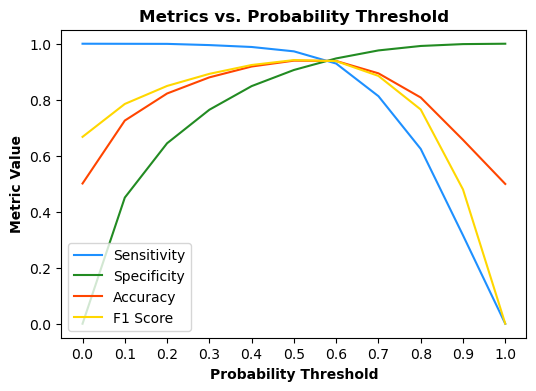

In [112]:
from sklearn.metrics import confusion_matrix

# Calculate predicted probabilities for the train data
train_probabilities = xgb_classifier.predict_proba(X_train)[:, 1]

# Apply different thresholds to obtain binary predictions for train data
thresholds = np.arange(0, 1.1, 0.1)
sensitivity = []
specificity = []
accuracy = []
f1_scores = []

for threshold in thresholds:
    train_predictions = (train_probabilities >= threshold).astype(int)
    tn, fp, fn, tp = confusion_matrix(y_train, train_predictions).ravel()
    sensitivity.append(tp / (tp + fn))
    specificity.append(tn / (tn + fp))
    accuracy.append((tp + tn) / (tp + tn + fp + fn))
    f1_scores.append(f1_score(y_train, train_predictions))

# Plot the sensitivity, specificity, accuracy, and F1 score against probability thresholds
plt.figure(figsize=(6,4))
plt.plot(thresholds, sensitivity, label='Sensitivity', color="dodgerblue")
plt.plot(thresholds, specificity, label='Specificity', color="forestgreen")
plt.plot(thresholds, accuracy, label='Accuracy', color="orangered")
plt.plot(thresholds, f1_scores, label='F1 Score', color="gold")
plt.xlabel('Probability Threshold', weight="bold")
plt.xticks(np.arange(0, 1.1, 0.1))
plt.ylabel('Metric Value', weight="bold")
plt.title('Metrics vs. Probability Threshold', weight="bold")
plt.legend(loc='lower left')
plt.show()

The above plot highlights that 0.6 is the best threshold - since this is the point for which Accuracy, Specificity, Specificity & F-1 Score are optimal and most stable.

# **Model Evaluation**

**Training & Test Data Sets Metrics**

In [114]:
# Calculate evaluation metrics for train data
train_accuracy = accuracy_score(y_train, y_train_pred)
train_precision = precision_score(y_train, y_train_pred, average='macro')
train_recall = recall_score(y_train, y_train_pred, average='macro')
train_f1_score = f1_score(y_train, y_train_pred, average='macro')

# Predict on the test data
y_test_pred = xgb_classifier.predict(X_test)

# Calculate evaluation metrics for test data
test_accuracy = accuracy_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred, average='macro')
test_recall = recall_score(y_test, y_test_pred, average='macro')
test_f1_score = f1_score(y_test, y_test_pred, average='macro')

# Create a DataFrame to store the evaluation metrics
metrics_data = {
    'Dataset': ['Train', 'Test'],
    'Accuracy': [train_accuracy, test_accuracy],
    'Precision': [train_precision, test_precision],
    'Recall': [train_recall, test_recall],
    'F1-score': [train_f1_score, test_f1_score]
}

metrics_df = pd.DataFrame(metrics_data)
metrics_df

,Dataset,Accuracy,Precision,Recall,F1-score
0,Train,0.939552,0.941537,0.939498,0.939479
1,Test,0.907249,0.912523,0.907465,0.906983


From the above Metrics Dataframe we see that the model achieves reasonably good performance on both the training and test sets - this meaning that it generalizes well upon unseen data.

**Confusion Matrix**

A Confusion Matrix is a table which evaluates a MLs performance by showing how accurately the model classifies instances. True Positives and True Negatives represent correct classifications, whereas False Positives & False Negatives indicate incorrect predictions.

In [116]:
from sklearn.metrics import confusion_matrix

# Calculate predictions for the training set using a threshold of 0.50
train_predictions = (xgb_classifier.predict_proba(X_train)[:, 1] >= 0.50).astype(int)
train_confusion_matrix = confusion_matrix(y_train, train_predictions)

# Calculate predictions for the test set using a threshold of 0.50
test_predictions = (xgb_classifier.predict_proba(X_test)[:, 1] >= 0.50).astype(int)
test_confusion_matrix = confusion_matrix(y_test, test_predictions)

# Calculate the total number of samples in each set
train_total = len(y_train)
test_total = len(y_test)

# Calculate the confusion matrix in percentage form for the training set
train_confusion_matrix_percent = train_confusion_matrix / train_total * 100

# Calculate the confusion matrix in percentage form for the test set
test_confusion_matrix_percent = test_confusion_matrix / test_total * 100

# Create a dataframe for the confusion matrix
confusion_matrix_df = pd.DataFrame({'Training Set': train_confusion_matrix_percent.flatten(),
                                    'Test Set': test_confusion_matrix_percent.flatten()},
                                   index=['True Positive (%)', 'True Negative (%)', 'False Positive (%)', 'False Negative (%)', ])
#
confusion_matrix_df

,Training Set,Test Set
True Positive (%),45.237449,42.687559
True Negative (%),4.681140,7.502374
False Positive (%),1.363636,1.772713
False Negative (%),48.717775,48.037354


From the above, we see that the model demonstrates a relatively balanced performance upon both the training and test sets. Specifically:
* **True Positive Rate** is slightly lower on the Test Set compared to the Training Set - thereby indicating a slight decrease in the model's ability to correctly identify positive instances.
* **True Negative Rate** is higher on the Test Set, meaning that the model might be better at correctly identifying negative instances.
* **False Positive Rate** is slightly higher on the Test Set, indicating an increase in the number of false positive predictions.
* **False Negative Rate** is relatively stable on both sets of data.

**ROC-AUC Curve**

The ROC-AOC Curve is a graphical representation of the trade-off between Sensitivity (True Positive Rate) and Specificity (True Negative Rate) for a Binary Classification Model. A higher AUC Value indicates better overall performance - this is because the model is therefore able to effectively differentiate between Positive & Negative cases.

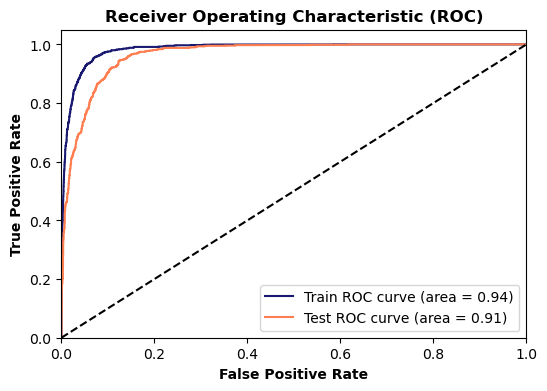

In [119]:
from sklearn.metrics import roc_curve, auc, roc_auc_score

# Calculate predicted probabilities for the train data
train_probabilities = xgb_classifier.predict_proba(X_train)[:, 1]

# Apply the threshold of 0.50 to obtain binary predictions for train data
train_predictions = (train_probabilities >= 0.50).astype(int)

# Calculate the false positive rate, true positive rate, and thresholds for train data
fpr_train, tpr_train, thresholds_train = roc_curve(y_train, train_probabilities)

# Calculate the ROC-AUC score for train data
roc_auc_train = roc_auc_score(y_train, train_predictions)

# Calculate predicted probabilities for the test data
test_probabilities = xgb_classifier.predict_proba(X_test)[:, 1]

# Apply the threshold of 0.50 to obtain binary predictions for test data
test_predictions = (test_probabilities >= 0.50).astype(int)

# Calculate the false positive rate, true positive rate, and thresholds for test data
fpr_test, tpr_test, thresholds_test = roc_curve(y_test, test_probabilities)

# Calculate the ROC-AUC score for test data
roc_auc_test = roc_auc_score(y_test, test_predictions)

# Plot the ROC curves
plt.figure(figsize=(6,4))
plt.plot(fpr_train, tpr_train, label='Train ROC curve (area = {:.2f})'.format(roc_auc_train), color="midnightblue")
plt.plot(fpr_test, tpr_test, label='Test ROC curve (area = {:.2f})'.format(roc_auc_test), color="coral")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', weight="bold")
plt.ylabel('True Positive Rate', weight="bold")
plt.title('Receiver Operating Characteristic (ROC)', weight="bold")
plt.legend(loc='lower right')
plt.show()

The above graph shows that both of the Training & Test ROC curves have relatively high AUC Scores (0.94 and 0.91 respectively); this meaning relatively good performance overall. 

Further, we also see that the curves are quite clustered towards to the top left corner, meaning that the model is effective in differentiating between Positive & Negative instances.

# **Important Features**

In [122]:
feature_importance_df

,Feature,Importance
0,Days_since_last_order,0.387072
1,Age,0.352584
2,Location_NE,0.030334
3,Location_SE1,0.029248
4,Gender_M,0.024412
5,Service_QI,0.023345
6,Location_SC,0.021531
7,Operation_Type_ILEOSTOMY,0.015334
8,Location_SE2,0.014743
9,Location_ET,0.014214


As mentioned earlier in this analysis, the 'Days_since_last_order' and 'Age' are the most important features in the model, as they collectively contain just over 74% of the knowledge required in predicting whether a patient will churn or not.

# **Conclusion**

To conclude, we've effectively been able to build a Machine Learning model to predict whether or not a patient will churn or not. Such prediction was based upon various patient attribute such as their Age, Days since last placing an order, Location, Operation Type, Gender, Product QIs and Service QIs raised. The primary purpose of this model was fundamentally to assist in identifying those patients who are at a higher risk of churning; therefore allowing the business to take action to implement retention campaign/strategies. By doing so, resources can be better allocated more effectively and efficiently, instead of going to the entire cohort of patients. Further, the success of this project can be measured by the model's ability to make predictions (which we have shown), but must now go further, in helping to reduce churn rates in the near future and improve overall patient satisfaction.